# Jonathan Halverson
# Tuesday, February 28, 2017
# Examination and cleaning of UFC.com data

Note that some fighters only fought in the WEC like LC Davis. Emmanuel Yarbrough doesn't appear in the heaviest fighters list because he weight value is null.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [2]:
df = pd.read_csv('ufc_dot_com_fighter_data_RAW_27Feb2017.csv', header=0)
df.head()

,Name,Nickname,Active,Record,Age,Height,Weight,Reach,LegReach,OutOf,From,College,Degree,Summary
0,Danny Abbadi,The Assassin,0,NaN,33.0,71.0,185.0,NaN,NaN,NaN,Amman Jordan,NaN,NaN,Striking and kicks
1,Tank Abbott,Tank,0,NaN,51.0,72.0,250.0,NaN,NaN,NaN,"Orange, California USA",NaN,NaN,"Punching power, strength"
2,Shamil Abdurakhimov,Abrek,1,17-4-0,35.0,75.0,235.0,76.0,41.0,Dagestan Russia,Dagestan Russia,NaN,NaN,Wrestling and boxing
3,Papy Abedi,Makambo,0,NaN,38.0,71.0,185.0,74.0,NaN,Stockholm Sweden,Kinshasa Democratic Republic of Congo,NaN,NaN,"Hits hard, strong, always in good shape, great..."
4,Ricardo Abreu,Demente,1,5-1-0,32.0,71.0,185.0,73.0,NaN,"Huntington Beach, California USA","Dourados, Mato Grosso do Sul Brazil",NaN,NaN,Jiu-Jitsu


In [3]:
df.shape

(1901, 14)

### What are the data types of the fields and how many non-null values in each?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 14 columns):
Name        1901 non-null object
Nickname    1048 non-null object
Active      1901 non-null int64
Record      533 non-null object
Age         1509 non-null float64
Height      1555 non-null float64
Weight      1557 non-null float64
Reach       870 non-null float64
LegReach    566 non-null float64
OutOf       1112 non-null object
From        1710 non-null object
College     173 non-null object
Degree      157 non-null object
Summary     1483 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 208.0+ KB


### Are names unique?

In [5]:
s = df.Name.value_counts()
names = s[s > 1].index
df[df.Name.isin(names)]

,Name,Nickname,Active,Record,Age,Height,Weight,Reach,LegReach,OutOf,From,College,Degree,Summary
575,Gerard Gordeau,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN,NaN
576,Gerard Gordeau,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN,NaN
840,Dong Hyun Kim,The Maestro,1,14-8-3,28.0,71.0,155.0,70.0,42.0,Busan South Korea,Busan South Korea,NaN,NaN,Well-rounded
841,Dong Hyun Kim,The Stun Gun,1,"22-3-1, 1NC",35.0,74.0,170.0,76.0,42.0,Busan South Korea,Suwon South Korea,NaN,NaN,"Well-rounded, judo, takedowns"


In [6]:
df = df.drop([576])

### Any names with non-alphabetical characters?

In [7]:
pd.set_option('display.max_colwidth', 50)
df[df.Name.apply(lambda x: not ''.join(x.split()).isalpha())][['Name', 'Active']]

,Name,Active
14,Razak Al-Hassan,0
72,Olivier Aubin-Mercier,1
193,Nah-Shon Burrell,0
301,J.C. Cottrell,1
317,Richard Crunkilton Jr.,0
423,Abdul-Kerim Edilov,1
430,John-Olav Einemo,0
460,Ashlee Evans-Smith,1
498,Xavier Foupa-Pokam,0
553,He-Man Gipson,0


In [8]:
# remove non-person entries
df = df.drop([1730, 1731, 1732])
df.iloc[1725:1735][['Name']]

,Name
1726,Chris Tickle
1727,Nolan Ticman
1728,Darren Till
1729,Ernie Tiserino
1733,Andrew Todhunter
1734,Kazuki Tokudome
1735,Ed Tomaselli
1736,Pedro Tome
1737,Tyler Toner
1738,James Toney


### How many names do not have two pieces?

In [9]:
df[df.Name.apply(lambda x: len(x.split()) != 2)][['Name']]

,Name
13,Mostapha Al Turk
74,Leonardo Augusto Leleco
89,Tae Hyun Bang
222,Antonio Carlos Junior
263,Yui Chul Nam
267,Heather Jo Clark
313,Mirko Cro Cop
317,Richard Crunkilton Jr.
330,Henrique da Silva
348,Phil De Fries


### Any names with two consecutive spaces?

In [10]:
df[df.Name.str.contains('  ')][['Name']].values

array([['Papy  Abedi'],
       ['Marcio  Alexandre'],
       ['Edson  Barboza'],
       ['Antonio  Carvalho'],
       ['John  Cholish'],
       ['Josh  Clopton'],
       ['Luiz  Dutra'],
       ['Justin  Edwards'],
       ['Alexandre  Ferreira'],
       ['Chris  Holdsworth'],
       ['John  Howard'],
       ['Valerie  Letourneau'],
       ['Matt  Lucas'],
       ['Mike  Lullo'],
       ['John  Makdessi'],
       ['Ryan  McGilivray'],
       ['Nick  Pace'],
       ['Robbie  Peralta']], dtype=object)

In [11]:
# replace and check that they are removed
df.Name = df.Name.apply(lambda x: ' '.join(x.split()))
df[df.Name.str.contains('  ')][['Name']].size

0

### How many fighters are active?

In [12]:
df[df.Active == 1].shape[0]

533

### How many non-null values for active fighters?

In [13]:
df[df.Active == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 2 to 1899
Data columns (total 14 columns):
Name        533 non-null object
Nickname    373 non-null object
Active      533 non-null int64
Record      532 non-null object
Age         530 non-null float64
Height      532 non-null float64
Weight      533 non-null float64
Reach       504 non-null float64
LegReach    450 non-null float64
OutOf       522 non-null object
From        524 non-null object
College     50 non-null object
Degree      44 non-null object
Summary     517 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 62.5+ KB


### What the min, max and median of the numerical columns?

In [14]:
df.describe().applymap(lambda x: round(x, 1)).drop('Active', axis=1)

,Age,Height,Weight,Reach,LegReach
count,1509.0,1555.0,1557.0,870.0,566.0
mean,33.9,70.5,170.8,71.8,40.2
std,5.8,3.3,34.8,4.1,2.8
min,20.0,60.0,115.0,60.0,32.0
25%,30.0,68.0,145.0,69.0,39.0
50%,33.0,71.0,170.0,72.0,40.0
75%,37.0,73.0,185.0,74.8,42.0
max,58.0,84.0,415.0,84.0,72.0


We see the maximum leg reach of 72 must be a mistake.

### Who are the oldest active fighters?

In [15]:
df[df.Active == 1].sort_values('Age', ascending=False)[['Name', 'Age']].head(20)

,Name,Age
730,Mark Hunt,42.0
1569,Anderson Silva,41.0
12,Yoshihiro Akiyama,41.0
1363,Mike Pyle,41.0
1215,Antonio Rogerio Nogueira,40.0
1194,Roy Nelson,40.0
990,Demian Maia,39.0
950,Hector Lombard,39.0
96,Josh Barnett,39.0
110,Vitor Belfort,39.0


### Who are the youngest active fighters?

In [16]:
df[df.Active == 1].sort_values('Age', ascending=True)[['Name', 'Age']].head(20)

,Name,Age
1219,Sage Northcutt,20.0
1359,Claudio Puelles,20.0
1382,Ricardo Ramos,21.0
974,Veronica Macedo,21.0
1776,Paige VanZant,22.0
1262,Larissa Pacheco,22.0
1036,Jake Matthews,22.0
1327,Sergio Pettis,23.0
373,Marc Diakiese,23.0
1312,Viviane Pereira,23.0


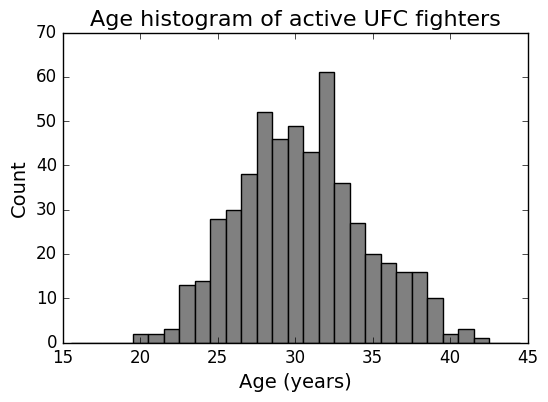

In [17]:
counts, edges, patches = plt.hist(df[pd.notnull(df.Age) & (df.Active == 1)].Age, bins=np.arange(15.5, 45.5, 1.0), align='mid', color='gray')
patches[0].set_snap(True)
plt.xlim(15, 45)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Age histogram of active UFC fighters')

What is the average and median age of active fighters?

In [18]:
df[df.Active == 1].Age.mean(), df[df.Active == 1].Age.median()

(30.420754716981133, 30.0)

### Who are the tallest fighters?

In [19]:
df.sort_values('Height', ascending=False)[['Name', 'Height']].head(20)

,Name,Height
1663,Stefan Struve,84.0
1528,Semmy Schilt,83.0
1587,Wes Sims,82.0
1058,Gan McGee,82.0
261,Dan Christison,80.0
1679,Tim Sylvia,80.0
642,Gerry Harris,80.0
1041,Jack May,80.0
740,Brad Imes,79.0
1048,Sean McCorkle,79.0


### Who are the shortest fighters?

In [20]:
df.sort_values('Height', ascending=True)[['Name', 'Height']].head(20)

,Name,Height
1696,Danielle Taylor,60.0
1264,Gary Padilla,60.0
1312,Viviane Pereira,60.0
1743,Tecia Torres,61.0
1164,Jamie Moyle,61.0
1138,Homer Moore,61.0
984,Angela Magana,61.0
1179,Rin Nakai,61.0
451,Carla Esparza,61.0
879,Tina Lahdemaki,62.0


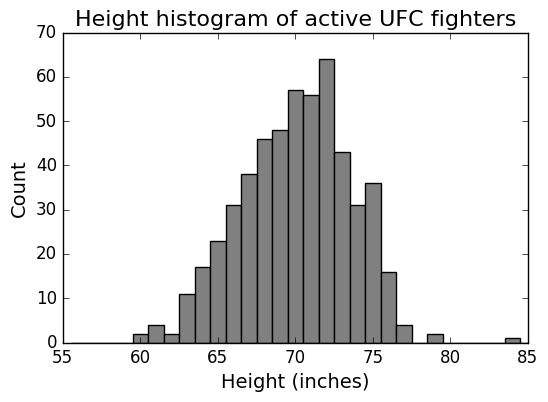

In [21]:
counts, edges, patches = plt.hist(df[pd.notnull(df.Height) & (df.Active == 1)].Height, bins=np.arange(55.5, 86.5, 1.0), align='mid', color='gray')
patches[0].set_snap(True)
plt.xlim(55, 85)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.title('Height histogram of active UFC fighters')

### Who are the heaviest fighters?

In [22]:
df.sort_values('Weight', ascending=False)[['Name', 'Weight']].head(20)

,Name,Weight
1756,Teila Tuli,415.0
1432,Mark David Robinson,300.0
1565,Wes Shivers,285.0
1048,Sean McCorkle,265.0
187,Mark Burch,265.0
1452,Jared Rosholt,265.0
230,Shane Carwin,265.0
730,Mark Hunt,265.0
773,Zak Jensen,265.0
790,Timothy Johnson,265.0


### Who are lightest fighters?

In [23]:
df.sort_values('Weight', ascending=True)[['Name', 'Weight']].head(20)

,Name,Weight
1183,Rose Namajunas,115.0
33,Ericka Almeida,115.0
451,Carla Esparza,115.0
1884,Ashley Yoder,115.0
1307,Jessica Penne,115.0
1776,Paige VanZant,115.0
1635,Cristina Stanciu,115.0
1696,Danielle Taylor,115.0
49,Jessica Andrade,115.0
232,Cortney Casey,115.0


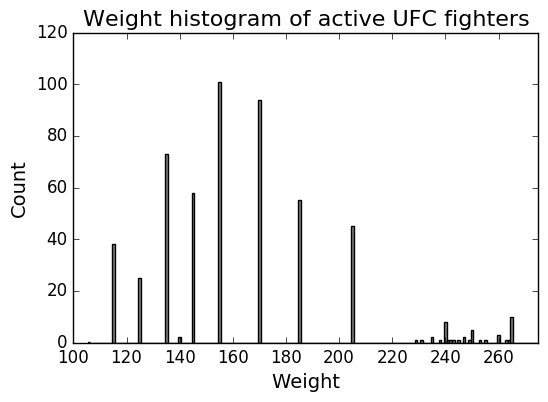

In [24]:
plt.hist(df[pd.notnull(df.Weight) & (df.Active == 1)].Weight, bins=np.arange(105.5, 275.5, 1.0), align='mid', color='gray')
plt.xlim(100, 275)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Weight histogram of active UFC fighters')

### Who has the longest leg reach?

In [25]:
df = df.set_value(1529, 'LegReach', np.nan) # replace incorrect value of 72
df.sort_values('LegReach', ascending=False)[['Name', 'LegReach', 'Height', 'Reach']].head(20)

,Name,LegReach,Height,Reach
241,Magnus Cedenblad,48.0,75.0,79.0
1663,Stefan Struve,48.0,84.0,84.0
284,Christian Colombo,48.0,77.0,80.0
645,Walt Harris,47.0,77.0,77.0
1808,Alexander Volkov,47.0,79.0,80.0
1759,Marcin Tybura,46.0,75.0,78.0
134,Curtis Blaydes,46.0,76.0,80.0
617,Alexander Gustafsson,46.0,77.0,79.0
676,Jack Hermansson,46.0,73.0,77.0
1517,Ben Saunders,45.0,74.0,77.0


### Who has the shortest leg reach?

In [26]:
df.sort_values('LegReach', ascending=True)[['Name', 'LegReach', 'Height', 'Reach']].head(20)

,Name,LegReach,Height,Reach
519,Claudia Gadelha,32.0,64.0,63.0
1696,Danielle Taylor,33.0,60.0,60.0
784,Demetrious Johnson,34.0,63.0,64.0
444,Ian Entwistle,35.0,65.0,64.0
451,Carla Esparza,35.0,61.0,63.0
385,John Dodson,35.0,63.0,66.0
383,Drew Dober,35.0,68.0,70.0
630,Seohee Ham,35.0,62.0,62.0
1743,Tecia Torres,35.0,61.0,60.0
49,Jessica Andrade,35.0,63.0,62.0


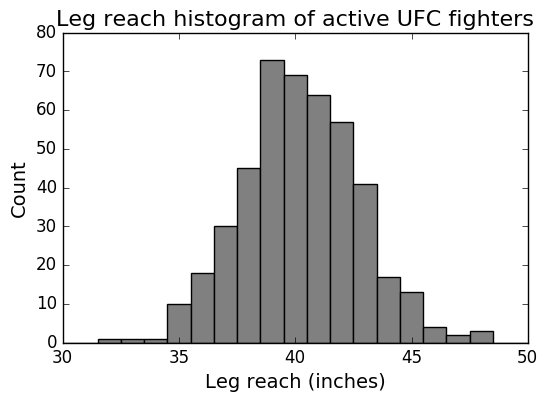

In [27]:
counts, edges, patches = plt.hist(df[pd.notnull(df.LegReach) & (df.Active == 1)].LegReach, bins=np.arange(25.5, 75.5, 1.0), align='mid', color='gray')
patches[0].set_snap(True)
plt.xlim(30, 50)
plt.xlabel('Leg reach (inches)')
plt.ylabel('Count')
plt.title('Leg reach histogram of active UFC fighters')

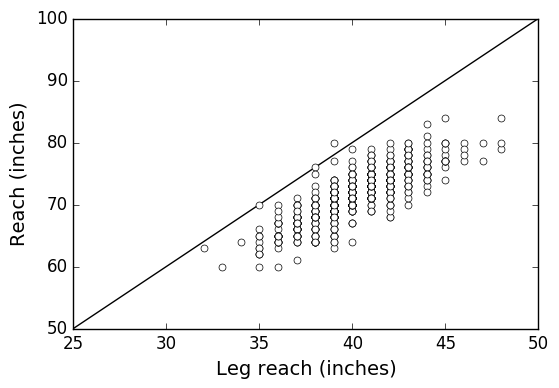

In [28]:
plt.plot(np.linspace(25, 50), 2 * np.linspace(25, 50), 'k-')
plt.plot(df.LegReach, df.Reach, 'wo')
plt.xlabel('Leg reach (inches)')
plt.ylabel('Reach (inches)')

### Which fighters went to college and/or earned a degree?

In [29]:
pd.set_option('display.max_rows', 200)
df[pd.notnull(df.College) | pd.notnull(df.Degree)][['Name', 'College', 'Degree']]

,Name,College,Degree
25,Jim Alers,University of Central Florida,Elementary Education
46,Corey Anderson,University of Wisconsin-Whitewater,Business Administration
71,Rich Attonito,Hofstra University,Communications
80,Ryan Bader,Arizona State University,Justice & Social Inquiry
84,Siyar Bahadurzada,Arnhem University,International Business and Languages
89,Tae Hyun Bang,Kyungbuk Science University,Political Studies
98,Phil Baroni,Central Michigan University,NaN
102,Pat Barry,Louisiana State University,NaN
107,Johnny Bedford,Cleveland State University,NaN
120,Dennis Bermudez,Bloomsburg University,Anthropology


### Are any fighters from or fighting out of Massachusetts?

In [30]:
cols = ['Name', 'Active', 'OutOf', 'From']
df[df.From.str.contains('Massachusetts|MA') | df.OutOf.str.contains('Massachusetts|MA')][cols]

,Name,Active,OutOf,From
138,Kyle Bochniak,1,"Boston, Massachusetts USA","Gloucester, Massachusetts USA"
360,Jason DeLucia,0,NaN,"Bellingham, Massachusetts USA"
490,Kenny Florian,0,"Brookline, Massachusetts USA","Westwood, Massachusetts USA"
492,Rob Font,1,"Woburn, Massachusetts USA","Leominster, Massachusetts USA"
518,Ricardo Funch,0,"Ludlow, Massachusetts USA",Lencois-Bahia Brazil
528,Sean Gannon,0,NaN,"Boston, MA., MA. USA"
566,Gabriel Gonzaga,0,"Worcester, Massachusetts USA",Rio de Janeiro Brazil
601,Josh Grispi,0,"Rockland, MA USA","Boston, MA USA"
725,John Howard,0,"Boston, Massachusetts USA","Boston, Massachusetts USA"
821,Alex Karalexis,0,NaN,"Boston, MA USA"


In [31]:
df.to_csv('ufc_dot_com_fighter_data_CLEANED_27Feb2017.csv', index=False)

### Are any fighters from or fighting out of Connecticut?

In [32]:
ct = df[df.From.str.contains('Connecticut|CT') | df.OutOf.str.contains('Connecticut|CT')][cols]
ct

,Name,Active,OutOf,From
309,Dan Cramer,0,NaN,"Danbury, Connecticut USA"
834,Will Kerr,0,"New London, CT USA","New London, CT USA"
1702,Glover Teixeira,1,"Danbury, Connecticut United States","Sobralia, Minas Gerais Brazil"


In [33]:
ct.to_latex('ct.tex')

### Weight classes: It is hard with this data alone to separate men and women

In [34]:
df[df.Active == 1].Weight.value_counts().sort_index()

115.0     38
125.0     25
135.0     73
140.0      2
145.0     58
155.0    101
170.0     94
185.0     55
205.0     45
229.0      1
231.0      1
235.0      2
238.0      1
240.0      8
241.0      1
242.0      1
243.0      1
245.0      1
247.0      2
249.0      1
250.0      5
253.0      1
255.0      1
260.0      3
263.0      1
264.0      1
265.0     10
Name: Weight, dtype: int64

In [35]:
avg_age = df[(df.Active == 1) & (df.Weight > 145) & (df.Weight < 206)].groupby('Weight').agg({'Age':[np.size, np.mean]})
avg_age.loc['265.0'] = [df[(df.Active == 1) & (df.Weight > 205)].Age.size, df[(df.Active == 1) & (df.Weight > 205)].Age.mean()]
avg_age

Age           
         size       mean
Weight                  
155.0   101.0  30.089109
170.0    94.0  30.795699
185.0    55.0  31.636364
205.0    45.0  31.244444
265.0    42.0  32.738095

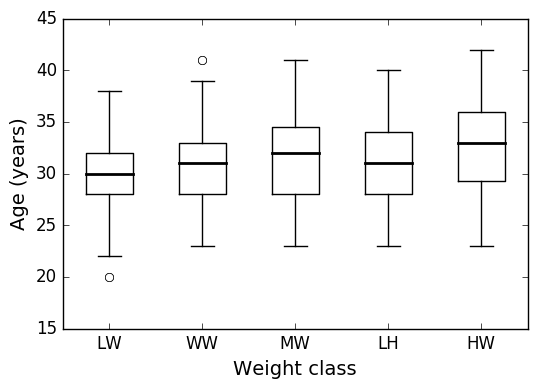

In [40]:
years = df[(df.Active == 1) & pd.notnull(df.Age)]

lw = years[years.Weight == 155].Age
ww = years[years.Weight == 170].Age
mw = years[years.Weight == 185].Age
lh = years[years.Weight == 205].Age
hw = years[years.Weight > 205].Age

plt.boxplot([lw, ww, mw, lh, hw], labels=['LW', 'WW', 'MW', 'LH', 'HW'])
plt.ylim(15, 45)
plt.xlabel('Weight class')
plt.ylabel('Age (years)')

In [41]:
from scipy.stats import f_oneway
F_statistic, p_value = f_oneway(lw, ww, mw, lh, hw)
F_statistic, p_value

(3.7001651694317821, 0.005800482709305472)

We see that the average age is not the same across weight classes.